<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day24_VGG_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGGNET Implementation

In [ ]:
!from google.colab import drive
drive.mount('/content/drive')

/bin/bash: line 1: from: command not found
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
# import necessary libraries for ann model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import os
import cv2
import matplotlib.pyplot as plt


# Importing Link dataset


In [ ]:
DATADIR="/content/drive/MyDrive/Data_Science_Boot_Camp/week6/day_24/flowers"
IMG_SIZE = 180
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


#For Reading only one image

(214, 320, 3)


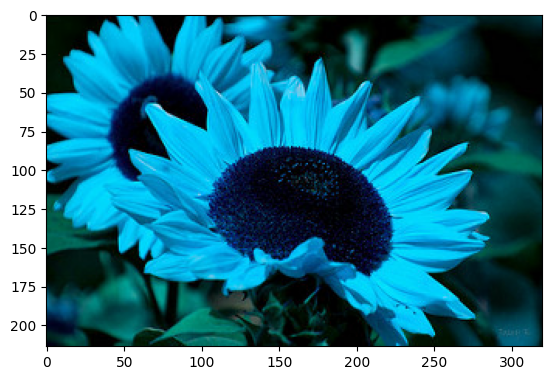

In [ ]:
for category in CATEGORIES[3:]:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    print(img_array.shape)
    plt.imshow(img_array)
    plt.show()
    break
  break

# Reading all the data set

In [ ]:
from tqdm import tqdm
data = []
def create_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    label = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        image_array = cv2.imread(os.path.join(path, img))
        reshaped_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
        data.append([reshaped_array, label])
      except Exception as e:
        pass

#Calling Create Data function and printing data

In [ ]:
create_data()

100%|██████████| 984/984 [00:06<00:00, 158.80it/s]


In [ ]:
print(np.shape(data))

(4323, 2)


In [ ]:
#checking shape of data
np.shape(data)

(4323, 2)

In [ ]:
type(data)

list

In [ ]:
X = []
y = []
for features,label in tqdm(data):
  # features = features.flatten()
  X.append(features)
  y.append(label)

100%|██████████| 4323/4323 [00:00<00:00, 970818.45it/s]


#Converting into Numpy Array

In [ ]:
X = np.array(X)
y = np.array(y)
# X = X.reshape(-1, IMAGE_SIZE*IMAGE_SIZE*3)
# y = y.reshape(-1, y.shape[-1])

print(X.shape, y.shape)
type(X), type(y)

(4323, 180, 180, 3) (4323,)


(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

((3242, 180, 180, 3), (1081, 180, 180, 3))

##Checking shape of splited dataset

In [ ]:
# print(f'X Train:{np.shape(X_train)}, X Test: {X_test.shape}, Y Tain: {y_train.shape}, Y Test: {y_test.shape}')
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((3242, 180, 180, 3), (1081, 180, 180, 3), (3242,), (1081,))

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    featurewise_center= False, # set input mean to 0 over the dataset
    samplewise_center= False, # set each sample mean to 0
    zca_whitening= False, # Apply ZCA whitening
    rescale=1.0/255.0,
    rotation_range=10, # Randomly rotate images in the range (degree, 0 to 10)
    width_shift_range=0.2, # randomly shift images horizontally
    height_shift_range=0.2, #randomly shift images vertically
    horizontal_flip=True
)

# Fit the data generator on your training data
datagen.fit(X_train)

#Building The VGGNET  Model Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

# Define the CNN model
model = Sequential()

# First set of layers from part 1
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second set of layers from part 1
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third set of layers from part 1
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fourth set of layers from part 1
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fifth set of layers from part 1
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(5, activation='relu'))  # Change 1000 to the appropriate number of classes

# Build the model
model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_66 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_68 (Conv2D)          (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                 

#Training the Model

In [ ]:
start_time = time.time()
history=model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
end_time = time.time()

Epoch 1/3
102/102 [==============================] - 37s 328ms/step - loss: 1.9011 - accuracy: 0.1721 - val_loss: 1.6194 - val_accuracy: 0.1933
Epoch 2/3
102/102 [==============================] - 31s 305ms/step - loss: 1.6094 - accuracy: 0.1724 - val_loss: 1.6194 - val_accuracy: 0.1933
Epoch 3/3
102/102 [==============================] - 31s 300ms/step - loss: 1.6094 - accuracy: 0.1724 - val_loss: 1.6194 - val_accuracy: 0.1933


#Evaluating the Model

In [ ]:
# Assuming you have trained the model using fit

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)


# Print the training and test accuracy
print(f"Training Accuracy: {train_accuracy*100}%")
print(f"Test Accuracy: {test_accuracy*100}%")

34/34 [==============================] - 3s 90ms/step - loss: 1.6194 - accuracy: 0.1933
Training Accuracy: 17.242443561553955%
Test Accuracy: 19.33394968509674%


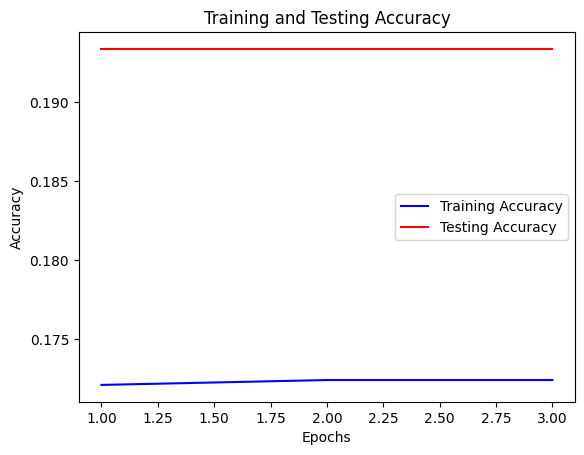

In [ ]:
# Collect training and testing accuracy values
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Create a plot
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, testing_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()